In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
api_service_name = "youtube"
api_version = "v3"
api_key = ''
youtube = build('youtube', 'v3', developerKey = api_key)

## 測試並取得頻道欄位資訊

request使用說明：https://developers.google.com/youtube/v3/docs/channels/list
JsonFormatter：https://jsonformatter.curiousconcept.com/#

In [5]:
channel_id = 'UCln9P4Qm3-EAY4aiEPmRwEA' # Ado
def test_get_channel_stats(youtube, channel_id):
    
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics,topicDetails,brandingSettings,contentOwnerDetails,localizations',
        id=channel_id)
    response = request.execute()
    return response

In [6]:
test_get_channel_stats(youtube, channel_id)

{'kind': 'youtube#channelListResponse',
 'etag': 'V2iI9useIIqXQN1thUSJSD-Qw30',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': 'oeL5RU-TjAo2vA6CMkU6wBd9F8s',
   'id': 'UCln9P4Qm3-EAY4aiEPmRwEA',
   'snippet': {'title': 'Ado',
    'description': '元気です。',
    'customUrl': '@ado1024',
    'publishedAt': '2018-08-18T02:02:50Z',
    'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEnBjf7pkppVLV7WYe4Nb4g3sge1h-2IlXAvLnRGgrMkMfL4NadPQ=s88-c-k-c0x00ffffff-no-nd-rj',
      'width': 88,
      'height': 88},
     'medium': {'url': 'https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEnBjf7pkppVLV7WYe4Nb4g3sge1h-2IlXAvLnRGgrMkMfL4NadPQ=s240-c-k-c0x00ffffff-no-nd-rj',
      'width': 240,
      'height': 240},
     'high': {'url': 'https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEnBjf7pkppVLV7WYe4Nb4g3sge1h-2IlXAvLnRGgrMkMfL4NadPQ=s800-c-k-c0x00ffffff-no-nd-rj',
      'width': 800,
      'height': 800}},
    'localized': {'t

## 測試並了解欄位後，針對不同頻道做查詢

In [7]:
channel_ids = ['UCAYrMNl92jw6cpjdpBP8JyA', # Ru's Paino Ru味春捲
               'UCI7ktPB6toqucpkkCiolwLg', # Pan Paino1
               'UCyjuFsbclXyntSRMBAILzbw', # 2CELLOS
               'UCln9P4Qm3-EAY4aiEPmRwEA', # Ado
               'UCvpredjG93ifbCP1Y77JyFA', # YOASOBI1
               'UCPKlrgZXnnb89nSeITvTdGA', # 星野源
               'UC2JzylaIF8qeowc7-5VwwmA', # 美波
               'UC9zY_E8mcAo_Oq772LEZq8Q', # The First Take
               'UCDbQblY1XASbgqOXmy6FOFQ' # kobasolo
              ]

In [8]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    requests = youtube.channels().list(
        part="snippet,contentDetails,statistics,topicDetails,brandingSettings,contentOwnerDetails,localizations",
        id = ','.join(channel_ids))
    response = requests.execute()
    
#     return response
# 若以找回到欄位再取消註解
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'], # 頻道名稱
                    Description = response['items'][i]['snippet']['description'], # 頻道介紹
                    Published = response['items'][i]['snippet']['publishedAt'], # 頻道創建日期
                    Country = response['items'][i]['snippet']['country'], # 頻道位置
                    Subscribers = response['items'][i]['statistics']['subscriberCount'], # 訂閱人數
                    Views = response['items'][i]['statistics']['viewCount'], # 總觀看人數
                    Playlist = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'], # 總上傳影片id
                    VideoCount = response['items'][i]['statistics']['videoCount'], # 頻道數量
                    Topic = response['items'][i]['topicDetails']['topicCategories'], # 頻道類型
                    Image = response['items'][i]['snippet']['thumbnails']['high']['url']) # 頻道圖片
#                     Keyword = response['items'][i]['brandingSettings']['channel']) # 關鍵字
        all_data.append(data)
    return all_data

In [10]:
music_channel = get_channel_stats(youtube, channel_ids)

## 轉成dataframe

In [12]:
channel_data = pd.DataFrame(music_channel)
channel_data

,Channel_name,Description,Published,Country,Subscribers,Views,Playlist,VideoCount,Topic,Image
0,Pan Piano,台湾のピアニストです！ \nアニソンを弾いてます～ \n良かったら、チャンネル登録お願いしま...,2016-07-27T15:21:51Z,TW,3340000,518252207,UUI7ktPB6toqucpkkCiolwLg,537,[https://en.wikipedia.org/wiki/Classical_music...,https://yt3.ggpht.com/ytc/AMLnZu-uZODxdm-BCEo0...
1,Ru's Piano Ru味春捲,"I’m RuRu, a piano youtuber from Taiwan.\nMakin...",2018-03-14T09:38:37Z,TW,2240000,287581808,UUAYrMNl92jw6cpjdpBP8JyA,389,"[https://en.wikipedia.org/wiki/Music_of_Asia, ...",https://yt3.ggpht.com/ytc/AMLnZu_-ZUJbCF-LRu25...
2,Ado,元気です。,2018-08-18T02:02:50Z,JP,3660000,1246944609,UUln9P4Qm3-EAY4aiEPmRwEA,80,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...
3,kobasolo,毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...,2008-06-30T15:34:30Z,JP,3000000,1411811905,UUDbQblY1XASbgqOXmy6FOFQ,498,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...
4,星野源,音楽家・俳優・文筆家。\n2010年に1stアルバム『ばかのうた』にてソロデビュー。2016...,2015-05-08T03:39:24Z,JP,1460000,912151607,UUPKlrgZXnnb89nSeITvTdGA,94,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/DLCVX6ArRGaHMe4k4N7Q_QtY...
5,THE FIRST TAKE,A microphone and a white studio.\n\nAnd 1 rule...,2019-11-05T11:51:17.905563Z,JP,6620000,2298040682,UU9zY_E8mcAo_Oq772LEZq8Q,410,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/ytc/AMLnZu9H0hC1Gt8ZLT4V...
6,2CELLOS,The official home of 2CELLOS - we post our new...,2011-10-17T21:02:43Z,HR,6260000,1602191143,UUyjuFsbclXyntSRMBAILzbw,213,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/ytc/AMLnZu9V7gXnpIUCJYKK...
7,Ayase / YOASOBI,ボカロP・Ayase、そしてAyaseがコンポーザーを務めるユニット・YOASOBIのYou...,2018-11-16T23:11:18Z,JP,3960000,1984944846,UUvpredjG93ifbCP1Y77JyFA,105,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/ytc/AMLnZu_8o8D8yLIaOLRZ...
8,美波,【美波 Official Youtube Channel】,2016-01-03T14:58:38Z,JP,1300000,406038151,UU2JzylaIF8qeowc7-5VwwmA,7,"[https://en.wikipedia.org/wiki/Music_of_Asia, ...",https://yt3.ggpht.com/ytc/AMLnZu-a_zfDCmdvUihG...


## 查看資料型態並將數值轉為數值型態

In [13]:
channel_data.dtypes

Channel_name    object
Description     object
Published       object
Country         object
Subscribers     object
Views           object
Playlist        object
VideoCount      object
Topic           object
Image           object
dtype: object

In [14]:
channel_data['Published'] = pd.to_datetime(channel_data['Published']).dt.date
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['VideoCount'] = pd.to_numeric(channel_data['VideoCount'])
print(channel_data.dtypes)
channel_data

Channel_name    object
Description     object
Published       object
Country         object
Subscribers      int64
Views            int64
Playlist        object
VideoCount       int64
Topic           object
Image           object
dtype: object


,Channel_name,Description,Published,Country,Subscribers,Views,Playlist,VideoCount,Topic,Image
0,Pan Piano,台湾のピアニストです！ \nアニソンを弾いてます～ \n良かったら、チャンネル登録お願いしま...,2016-07-27,TW,3340000,518252207,UUI7ktPB6toqucpkkCiolwLg,537,[https://en.wikipedia.org/wiki/Classical_music...,https://yt3.ggpht.com/ytc/AMLnZu-uZODxdm-BCEo0...
1,Ru's Piano Ru味春捲,"I’m RuRu, a piano youtuber from Taiwan.\nMakin...",2018-03-14,TW,2240000,287581808,UUAYrMNl92jw6cpjdpBP8JyA,389,"[https://en.wikipedia.org/wiki/Music_of_Asia, ...",https://yt3.ggpht.com/ytc/AMLnZu_-ZUJbCF-LRu25...
2,Ado,元気です。,2018-08-18,JP,3660000,1246944609,UUln9P4Qm3-EAY4aiEPmRwEA,80,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...
3,kobasolo,毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...,2008-06-30,JP,3000000,1411811905,UUDbQblY1XASbgqOXmy6FOFQ,498,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...
4,星野源,音楽家・俳優・文筆家。\n2010年に1stアルバム『ばかのうた』にてソロデビュー。2016...,2015-05-08,JP,1460000,912151607,UUPKlrgZXnnb89nSeITvTdGA,94,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/DLCVX6ArRGaHMe4k4N7Q_QtY...
5,THE FIRST TAKE,A microphone and a white studio.\n\nAnd 1 rule...,2019-11-05,JP,6620000,2298040682,UU9zY_E8mcAo_Oq772LEZq8Q,410,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/ytc/AMLnZu9H0hC1Gt8ZLT4V...
6,2CELLOS,The official home of 2CELLOS - we post our new...,2011-10-17,HR,6260000,1602191143,UUyjuFsbclXyntSRMBAILzbw,213,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/ytc/AMLnZu9V7gXnpIUCJYKK...
7,Ayase / YOASOBI,ボカロP・Ayase、そしてAyaseがコンポーザーを務めるユニット・YOASOBIのYou...,2018-11-16,JP,3960000,1984944846,UUvpredjG93ifbCP1Y77JyFA,105,"[https://en.wikipedia.org/wiki/Pop_music, http...",https://yt3.ggpht.com/ytc/AMLnZu_8o8D8yLIaOLRZ...
8,美波,【美波 Official Youtube Channel】,2016-01-03,JP,1300000,406038151,UU2JzylaIF8qeowc7-5VwwmA,7,"[https://en.wikipedia.org/wiki/Music_of_Asia, ...",https://yt3.ggpht.com/ytc/AMLnZu-a_zfDCmdvUihG...


## 輸出成excel

In [15]:
channel_data.to_excel('music_channel.xlsx')

In [39]:
# sns.set(font='SimHei', rc={'figure.figsize':(20,8)})
# ax = sns.barplot(x='Channel_name', y = 'Subscribers', data=channel_data)

## 查看頻道訂閱人數

In [34]:
def get_barplot(x, y):
    plt.figure(figsize = (20,8))
    plt.bar(x, y, color=['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f'])
    plt.title('Music Channel',fontsize=20)
    plt.show()

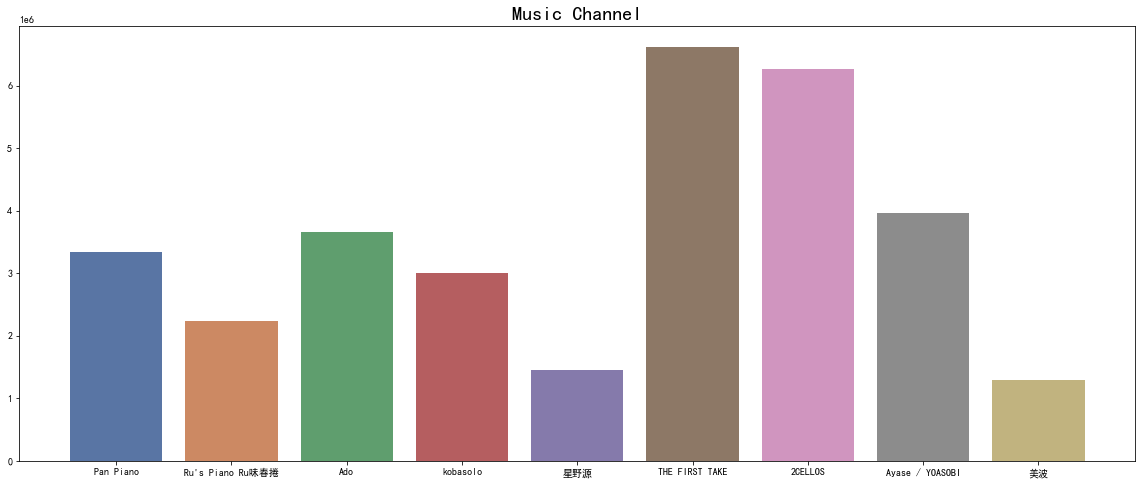

In [35]:
get_barplot(channel_data['Channel_name'], channel_data['Subscribers']) 

## 查看目前總觀看人數

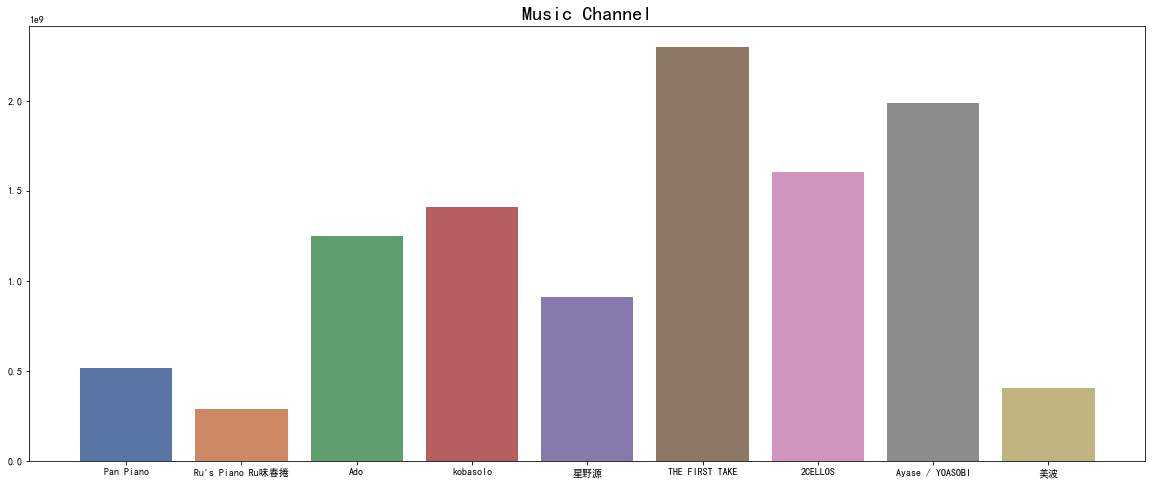

In [36]:
get_barplot(channel_data['Channel_name'], channel_data['Views']) 

## 查看頻道上傳影片數量

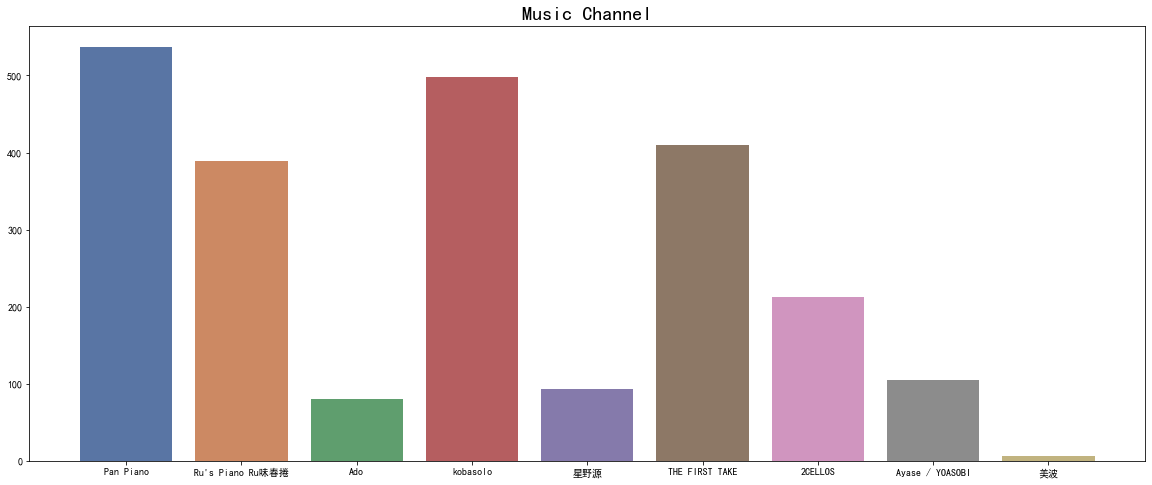

In [37]:
get_barplot(channel_data['Channel_name'], channel_data['VideoCount']) 

## 取得頻道全部影片的 id(以ado為例)
取得影片資訊：https://developers.google.com/youtube/v3/docs/playlistItems/list

In [43]:
channel_data[['Channel_name', 'Playlist', 'VideoCount']]

,Channel_name,Playlist,VideoCount
0,Pan Piano,UUI7ktPB6toqucpkkCiolwLg,537
1,Ru's Piano Ru味春捲,UUAYrMNl92jw6cpjdpBP8JyA,389
2,Ado,UUln9P4Qm3-EAY4aiEPmRwEA,80
3,kobasolo,UUDbQblY1XASbgqOXmy6FOFQ,498
4,星野源,UUPKlrgZXnnb89nSeITvTdGA,94
5,THE FIRST TAKE,UU9zY_E8mcAo_Oq772LEZq8Q,410
6,2CELLOS,UUyjuFsbclXyntSRMBAILzbw,213
7,Ayase / YOASOBI,UUvpredjG93ifbCP1Y77JyFA,105
8,美波,UU2JzylaIF8qeowc7-5VwwmA,7


In [44]:
playlist_id = channel_data.loc[channel_data['Channel_name'] == 'Ado', 'Playlist'].iloc[0]
playlist_id

'UUln9P4Qm3-EAY4aiEPmRwEA'

In [45]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
              part = 'contentDetails',
              playlistId = playlist_id,
              maxResults = 50) # 50 is max
    response = request.execute()
    
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages: 
        if next_page_token is None:
            more_pages = False
        else: # json存在nextPageToken，透過以下取得50以上的videos
            request = youtube.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = playlist_id,
                    pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    print('影片數量:', len(video_ids))
    return video_ids

In [46]:
video_ids = get_video_ids(youtube, playlist_id)
video_ids

影片數量: 80


['oL6ooQb-ZRQ',
 'V9_ZpqfqHFI',
 'd7DTFuMnoxg',
 'b3GCfyNKeLs',
 'hyV1AJiFNyo',
 '0iYLJLXX-Sw',
 'x1UsJ2Znjk0',
 '7i_nc5GGIsI',
 'gt-v_YCkaMY',
 'sk1Z-Hqwwog',
 '1FliVTcX8bQ',
 'TRk9_QLZYvI',
 'u-G_zzhLSy8',
 '_wZfYtYwxro',
 'iRMYLKIWyUk',
 'ZHAnZTVF_10',
 '55W2LxbQoHc',
 '5_-TcIOxm60',
 'kOW0rt4fpHg',
 'DTxrPgpW9Tc',
 'BMb5IetESGE',
 'wuYIVacOTF8',
 'Uuqp7WH4-Wo',
 'zcgoi61B5D8',
 '3tPBEjxqEc4',
 'nuvNgt60km4',
 'ECp9I1CPkJQ',
 'TTxzYrbDLwA',
 'fBnAP_FOy5U',
 'cyq5-StPISU',
 'PJTr-EUmbaA',
 'Flw53ezXBYg',
 'PcA3BIzKxiw',
 '0VkAQQKITSw',
 'xRayul0ZnkY',
 'dLmaSaCVFx0',
 'y-dMrhGdCms',
 'Cw_tD7MXeEI',
 'pWZwiUaA0O8',
 'jTVSU-Lr1ew',
 '-KQAAeUTOQ4',
 'P12337hMnbI',
 'cSgZxz3le7s',
 'eI_wC_Mlel4',
 'UcpAHDF8yZI',
 '1OI4Bp8fGYw',
 'YnSW8ian29w',
 'zs6Mnu4gMHM',
 'sOiMD45QGLs',
 'm_x_aUharLc',
 'QLsXgj4_gOc',
 'jg09lNupc1s',
 'nMpD5q5wqPM',
 'YTQV48V44Sw',
 'G_jdDwi3Otw',
 'Qp3b-RXtz4w',
 '1M_A3OIEceg',
 '13dECLUD-5Q',
 'n_sDtV5oZR0',
 'UoGacSBPYPc',
 'aOIrxUTBRgs',
 'X9aKVLPoKJk',
 'slcfa-

## 查看影片的欄位格式

In [47]:
def test_channel_video_detail(youtube, video_ids):
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
        part = 'snippet, statistics,topicDetails',
        id=','.join(video_ids[i:i+50]))
    response = request.execute()
    
    
    return response

In [ ]:
test_channel_video_detail(youtube, video_ids)

## 抓取不同欄位資料

In [49]:
def get_channel_video_detail(youtube, video_ids):
    
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
        part = 'snippet, statistics, topicDetails',
        id=','.join(video_ids[i:i+50]))
        response = request.execute()
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Description = video['snippet']['description'],
                               PublishedAt = video['snippet']['publishedAt'],
                               Lauguage = video['snippet']['defaultAudioLanguage'],
#                                Tags = video['snippet']['tags'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               CommentCount = video['statistics']['commentCount'],
                               Image = video['snippet']['thumbnails']['high']['url'])
#                                Topic = video['topicDetails']['topicCategories'])
            all_video_stats.append(video_stats)
    return all_video_stats

In [51]:
video_details = get_channel_video_detail(youtube, video_ids)

## 將影片轉成DataFrame

In [52]:
video_data = pd.DataFrame(video_details)
video_data

,Title,Description,PublishedAt,Lauguage,Views,Likes,CommentCount,Image
0,【アーカイブ】ライブのお願いとカムパネルラの感想,数日間だけアーカイブを残します\n\nこれからのライブに参加する方は聞いてください,2022-08-21T12:31:29Z,en-US,696980,33471,476,https://i.ytimg.com/vi/oL6ooQb-ZRQ/hqdefault.jpg
1,【Ado】Tot Musica（ウタ from ONE PIECE FILM RED）,求められたる救世主\n\n▼『Tot Musica』 Streaming & Downloa...,2022-08-17T11:00:12Z,ja,6908302,362332,11343,https://i.ytimg.com/vi/V9_ZpqfqHFI/hqdefault.jpg
2,Ado『ウタの歌 ONE PIECE FILM RED』発売記念特番,アルバム『ウタの歌 ONE PIECE FILM RED』発売記念特番アーカイブ公開中！\n...,2022-08-10T10:45:14Z,ja,1446351,45970,2232,https://i.ytimg.com/vi/d7DTFuMnoxg/hqdefault.jpg
3,【Ado】世界のつづき（ウタ from ONE PIECE FILM RED）,またおんなじ歌を歌うたび\nあなたを想うでしょう\n\n▼『世界のつづき』 Streamin...,2022-08-10T10:30:13Z,ja,3628663,136588,3880,https://i.ytimg.com/vi/b3GCfyNKeLs/hqdefault.jpg
4,【Ado】ウタカタララバイ（ウタ from ONE PIECE FILM RED）,わたしがやらなきゃ だから邪魔しないで お願い...\n\n▼『ウタカタララバイ』 Stre...,2022-08-06T09:00:13Z,ja,10318747,252443,7081,https://i.ytimg.com/vi/hyV1AJiFNyo/hqdefault.jpg
...,...,...,...,...,...,...,...,...
75,【Ado】恋愛裁判 歌いました,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26T12:45:00Z,ja,7122042,92198,1843,https://i.ytimg.com/vi/iHIrEqU5cwM/hqdefault.jpg
76,【Ado】脳内革命ガール 歌いました【ワンコーラス】,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26T12:00:07Z,ja,461723,13002,550,https://i.ytimg.com/vi/qL3chh5M5d0/hqdefault.jpg
77,【Ado】キライ・キライ・ジガヒダイ！ 歌いました,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26T12:00:06Z,ja,4416140,74480,1612,https://i.ytimg.com/vi/gmJiYoRhO5g/hqdefault.jpg
78,【Ado】妄想感傷代償連盟 歌いました【ワンコーラス】,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26T12:00:02Z,ja,1257211,37643,575,https://i.ytimg.com/vi/Io9gOyAlq9g/hqdefault.jpg


## 資料型態轉換

In [53]:
video_data['PublishedAt'] = pd.to_datetime(video_data['PublishedAt']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['CommentCount'] = pd.to_numeric(video_data['CommentCount'])
video_data

,Title,Description,PublishedAt,Lauguage,Views,Likes,CommentCount,Image
0,【アーカイブ】ライブのお願いとカムパネルラの感想,数日間だけアーカイブを残します\n\nこれからのライブに参加する方は聞いてください,2022-08-21,en-US,696980,33471,476,https://i.ytimg.com/vi/oL6ooQb-ZRQ/hqdefault.jpg
1,【Ado】Tot Musica（ウタ from ONE PIECE FILM RED）,求められたる救世主\n\n▼『Tot Musica』 Streaming & Downloa...,2022-08-17,ja,6908302,362332,11343,https://i.ytimg.com/vi/V9_ZpqfqHFI/hqdefault.jpg
2,Ado『ウタの歌 ONE PIECE FILM RED』発売記念特番,アルバム『ウタの歌 ONE PIECE FILM RED』発売記念特番アーカイブ公開中！\n...,2022-08-10,ja,1446351,45970,2232,https://i.ytimg.com/vi/d7DTFuMnoxg/hqdefault.jpg
3,【Ado】世界のつづき（ウタ from ONE PIECE FILM RED）,またおんなじ歌を歌うたび\nあなたを想うでしょう\n\n▼『世界のつづき』 Streamin...,2022-08-10,ja,3628663,136588,3880,https://i.ytimg.com/vi/b3GCfyNKeLs/hqdefault.jpg
4,【Ado】ウタカタララバイ（ウタ from ONE PIECE FILM RED）,わたしがやらなきゃ だから邪魔しないで お願い...\n\n▼『ウタカタララバイ』 Stre...,2022-08-06,ja,10318747,252443,7081,https://i.ytimg.com/vi/hyV1AJiFNyo/hqdefault.jpg
...,...,...,...,...,...,...,...,...
75,【Ado】恋愛裁判 歌いました,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26,ja,7122042,92198,1843,https://i.ytimg.com/vi/iHIrEqU5cwM/hqdefault.jpg
76,【Ado】脳内革命ガール 歌いました【ワンコーラス】,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26,ja,461723,13002,550,https://i.ytimg.com/vi/qL3chh5M5d0/hqdefault.jpg
77,【Ado】キライ・キライ・ジガヒダイ！ 歌いました,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26,ja,4416140,74480,1612,https://i.ytimg.com/vi/gmJiYoRhO5g/hqdefault.jpg
78,【Ado】妄想感傷代償連盟 歌いました【ワンコーラス】,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26,ja,1257211,37643,575,https://i.ytimg.com/vi/Io9gOyAlq9g/hqdefault.jpg


## 查看前10名的影片內容

In [54]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)
top10_videos

,Title,Description,PublishedAt,Lauguage,Views,Likes,CommentCount,Image
55,【Ado】うっせぇわ,正しさとは 愚かさとは それが何か見せつけてやる \n\nダウンロード/ストリーミング配信は...,2020-10-23,ja,238757665,2272859,230413,https://i.ytimg.com/vi/Qp3b-RXtz4w/hqdefault.jpg
46,【Ado】踊,ﾉヽ･/ ﾉヽ° 👾ﾅょら ⓚⓞーー💥🤟💙 🌴👽笑笑 \n\nStreaming & Dow...,2021-04-27,ja,144851459,1401302,59767,https://i.ytimg.com/vi/YnSW8ian29w/hqdefault.jpg
48,【Ado】ギラギラ,もしも神様が左利きならどんなに幸せか知れない\n\nダウンロード/ストリーミング配信はこちら...,2021-02-14,ja,118965958,965966,42321,https://i.ytimg.com/vi/sOiMD45QGLs/hqdefault.jpg
51,【Ado】レディメイド,大人にだけはなりたくなんかない\n\nダウンロード/ストリーミング配信はこちら：https:...,2020-12-24,ja,64875990,647224,19111,https://i.ytimg.com/vi/jg09lNupc1s/hqdefault.jpg
29,【Ado】阿修羅ちゃん,ねえ、ギャーギャー言っちゃって\n\nテレビ朝日系木曜ドラマ『ドクターX～外科医・大門未知子...,2021-10-28,ja,57024311,611254,14266,https://i.ytimg.com/vi/cyq5-StPISU/hqdefault.jpg
53,【Ado】ラブカ？ 歌いました,柊キライ様の ラブカ？ を歌わせていただきました。\n\n曲/柊キライ様 @Kirai_da...,2020-12-11,ja,36161517,448312,12116,https://i.ytimg.com/vi/YTQV48V44Sw/hqdefault.jpg
10,【Ado】新時代 (ウタ from ONE PIECE FILM RED),「ボクを信じて」\n\n▼新時代 Streaming & Download\nhttps:/...,2022-06-15,ja,35537946,660024,18286,https://i.ytimg.com/vi/1FliVTcX8bQ/hqdefault.jpg
61,【Ado】ボッカデラベリタ 歌いました,いい子じゃいられない\n\n曲/柊キライ 様\nhttps://www.youtube.co...,2020-06-02,ja,31116503,353323,7274,https://i.ytimg.com/vi/X9aKVLPoKJk/hqdefault.jpg
42,【Ado】夜のピエロ,理由もない不安が胸に押し寄せるんだ\n\n⬇︎Streaming & Download\nh...,2021-06-14,ja,19922488,375381,17805,https://i.ytimg.com/vi/cSgZxz3le7s/hqdefault.jpg
20,【Ado】心という名の不可解,覚めない夢なんてここにないと教えて\n\nStreaming & Download▶︎htt...,2022-01-17,ja,19710292,258083,4826,https://i.ytimg.com/vi/BMb5IetESGE/hqdefault.jpg


/Users/takuya/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12442 (\N{COMBINING KATAKANA-HIRAGANA SEMI-VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


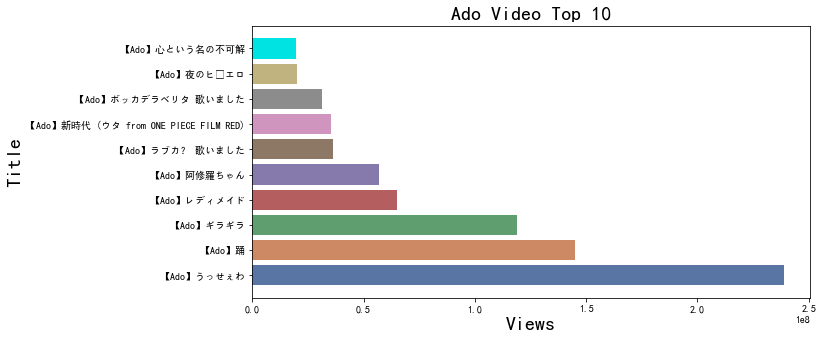

In [55]:
fig = plt.figure(figsize=(10, 5)) 
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3']
# creating the bar plot 
plt.barh(top10_videos['Title'], top10_videos['Views'], color=color) 
  
plt.xlabel("Views",fontsize=20) 
plt.ylabel("Title",fontsize=20) 
plt.title("Ado Video Top 10",fontsize=20)
plt.show()

## 加入月份

In [63]:
video_data['Month'] = pd.to_datetime(video_data['PublishedAt']).dt.strftime('%b')
video_data

,Title,Description,PublishedAt,Lauguage,Views,Likes,CommentCount,Image,Month
0,【アーカイブ】ライブのお願いとカムパネルラの感想,数日間だけアーカイブを残します\n\nこれからのライブに参加する方は聞いてください,2022-08-21,en-US,696980,33471,476,https://i.ytimg.com/vi/oL6ooQb-ZRQ/hqdefault.jpg,Aug
1,【Ado】Tot Musica（ウタ from ONE PIECE FILM RED）,求められたる救世主\n\n▼『Tot Musica』 Streaming & Downloa...,2022-08-17,ja,6908302,362332,11343,https://i.ytimg.com/vi/V9_ZpqfqHFI/hqdefault.jpg,Aug
2,Ado『ウタの歌 ONE PIECE FILM RED』発売記念特番,アルバム『ウタの歌 ONE PIECE FILM RED』発売記念特番アーカイブ公開中！\n...,2022-08-10,ja,1446351,45970,2232,https://i.ytimg.com/vi/d7DTFuMnoxg/hqdefault.jpg,Aug
3,【Ado】世界のつづき（ウタ from ONE PIECE FILM RED）,またおんなじ歌を歌うたび\nあなたを想うでしょう\n\n▼『世界のつづき』 Streamin...,2022-08-10,ja,3628663,136588,3880,https://i.ytimg.com/vi/b3GCfyNKeLs/hqdefault.jpg,Aug
4,【Ado】ウタカタララバイ（ウタ from ONE PIECE FILM RED）,わたしがやらなきゃ だから邪魔しないで お願い...\n\n▼『ウタカタララバイ』 Stre...,2022-08-06,ja,10318747,252443,7081,https://i.ytimg.com/vi/hyV1AJiFNyo/hqdefault.jpg,Aug
...,...,...,...,...,...,...,...,...,...
75,【Ado】恋愛裁判 歌いました,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26,ja,7122042,92198,1843,https://i.ytimg.com/vi/iHIrEqU5cwM/hqdefault.jpg,Aug
76,【Ado】脳内革命ガール 歌いました【ワンコーラス】,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26,ja,461723,13002,550,https://i.ytimg.com/vi/qL3chh5M5d0/hqdefault.jpg,Aug
77,【Ado】キライ・キライ・ジガヒダイ！ 歌いました,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26,ja,4416140,74480,1612,https://i.ytimg.com/vi/gmJiYoRhO5g/hqdefault.jpg,Aug
78,【Ado】妄想感傷代償連盟 歌いました【ワンコーラス】,歌ってみたリスト\nhttps://www.youtube.com/playlist?lis...,2018-08-26,ja,1257211,37643,575,https://i.ytimg.com/vi/Io9gOyAlq9g/hqdefault.jpg,Aug


In [64]:
video_data.to_excel('video_details.xlsx')

## 顯示月份上傳影片數量及排序

In [65]:
videos_per_month = video_data.groupby('Month', as_index=False).size()
videos_per_month

,Month,size
0,Apr,3
1,Aug,17
2,Dec,11
3,Feb,4
4,Jan,7
5,Jul,6
6,Jun,8
7,Mar,4
8,May,4
9,Nov,2


In [66]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [67]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered=True)
videos_per_month = videos_per_month.sort_index()
videos_per_month

,Month,size
Month,,
Jan,Jan,7
Feb,Feb,4
Mar,Mar,4
Apr,Apr,3
May,May,4
Jun,Jun,8
Jul,Jul,6
Aug,Aug,17
Sep,Sep,7


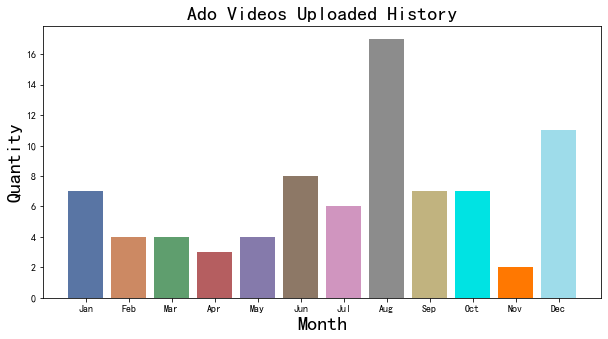

In [68]:
fig = plt.figure(figsize=(10, 5)) 
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3', '#ff7801','#9edcea']
# creating the bar plot 
plt.bar(videos_per_month['Month'], videos_per_month['size'], color=color) 
  
plt.xlabel("Month",fontsize=20) 
plt.ylabel("Quantity",fontsize=20) 
plt.title("Ado Videos Uploaded History",fontsize=20)
plt.show()